In [1]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd

In [2]:
%%R 
library(ggplot2)

In [3]:
import imp
logistic_regression = imp.load_source('logistic_regression', '../lib/logistic_regression.py')
from logistic_regression import *

In [4]:
from sklearn import datasets

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
x, y = datasets.make_classification(100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

In [7]:
data = pd.DataFrame({'x': np.array(x).flatten(), 'y': y})

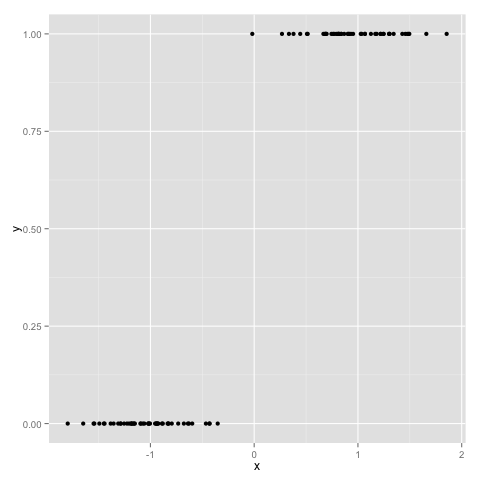

In [8]:
%%R -i data

ggplot(data=data, aes(x=x, y=y)) +
    geom_point()

# Batch gradient logistic regression

In [9]:
binomial = Binomial()
binomial.fit(x, y)
data = pd.DataFrame({'x': np.array(x).flatten(), 'y': y, 'p': binomial.predict(x).astype(str)})

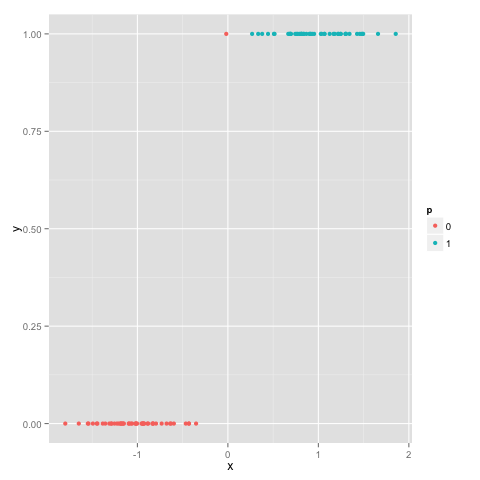

In [10]:
%%R -i data

ggplot(data=data, aes(x=x, y=y, color=p)) +
    geom_point()

# ScikitLearn logistic regression

In [11]:
binomial = LogisticRegression()
binomial.fit(x, y)
data = pd.DataFrame({'x': np.array(x).flatten(), 'y': y, 'p': binomial.predict(x).astype(str)})

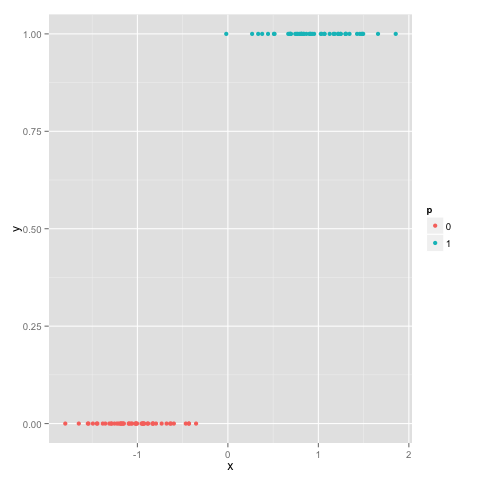

In [12]:
%%R -i data

ggplot(data=data, aes(x=x, y=y, color=p)) +
    geom_point()